In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')


In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/dsrscientist/DSData/master/happiness_score_dataset.csv")

In [3]:
df.head(10)

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
5,Finland,Western Europe,6,7.406,0.03140,1.29025,1.31826,0.88911,0.64169,0.41372,0.23351,2.61955
6,Netherlands,Western Europe,7,7.378,0.02799,1.32944,1.28017,0.89284,0.61576,0.31814,0.47610,2.46570
7,Sweden,Western Europe,8,7.364,0.03157,1.33171,1.28907,0.91087,0.65980,0.43844,0.36262,2.37119
8,New Zealand,Australia and New Zealand,9,7.286,0.03371,1.25018,1.31967,0.90837,0.63938,0.42922,0.47501,2.26425
9,Australia,Australia and New Zealand,10,7.284,0.04083,1.33358,1.30923,0.93156,0.65124,0.35637,0.43562,2.26646


In [4]:
df.shape

(158, 12)

In [5]:
df.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

In [7]:
df.isnull().sum()

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

In [8]:
df.describe()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


<AxesSubplot:xlabel='Happiness Score', ylabel='Density'>

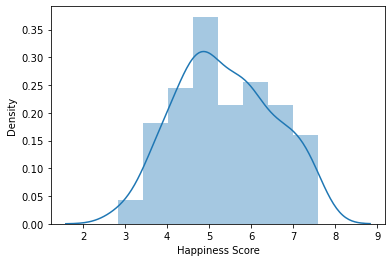

In [9]:
sns.distplot(df['Happiness Score'])

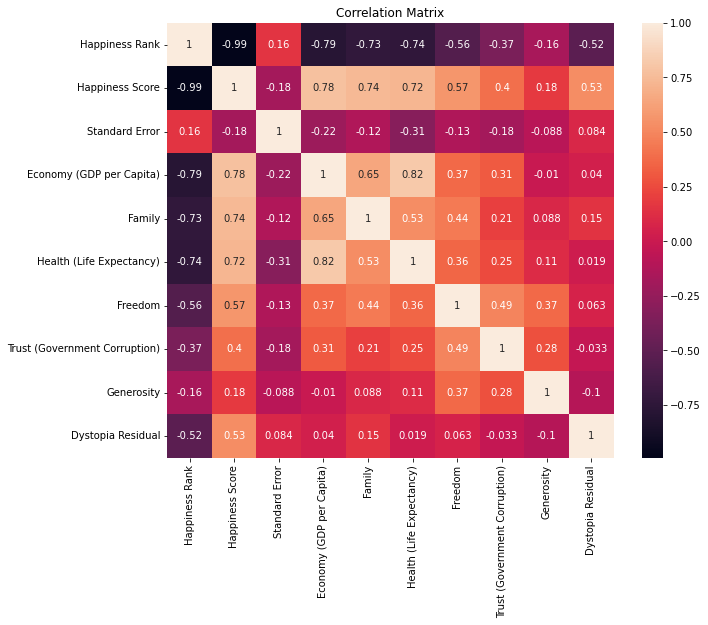

In [10]:
corr_mat = df.corr()
plt.figure(figsize=[10,8])
sns.heatmap(corr_mat,annot=True)
plt.title("Correlation Matrix")
plt.savefig("Correlation_matrix.jpg")
plt.show()

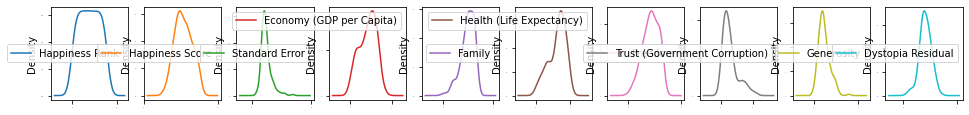

In [11]:
df.plot(kind='density', subplots=True, layout=(6,11), sharex=False, legend=True, fontsize=1, figsize=(18,12))
plt.show()

In [12]:
df.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')

In [13]:
df.dtypes

Country                           object
Region                            object
Happiness Rank                     int64
Happiness Score                  float64
Standard Error                   float64
Economy (GDP per Capita)         float64
Family                           float64
Health (Life Expectancy)         float64
Freedom                          float64
Trust (Government Corruption)    float64
Generosity                       float64
Dystopia Residual                float64
dtype: object

In [14]:
from sklearn.preprocessing import OrdinalEncoder
enc=OrdinalEncoder()

In [15]:
for i in df.columns:
    if df[i].dtypes=="object":
        df[i] = enc.fit_transform(df[i].values.reshape(-1,1))

In [16]:
x=df.drop(columns=['Happiness Score'],axis=1)
y=df['Happiness Score']

In [17]:
from sklearn.model_selection import train_test_split 

In [18]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.30,random_state=10)

In [19]:
df.describe()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,78.500000,5.120253,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754781,2.993321,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,0.000000,0.000000,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,39.250000,3.000000,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,78.500000,4.500000,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,117.750000,8.000000,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,157.000000,9.000000,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


# LinearRegression

In [20]:
from sklearn.linear_model import LinearRegression


LR = LinearRegression()

LR.fit(x_train,y_train)

predlr = LR.predict(x_test)

print("Training accuracy :", LR.score(x_train, y_train))

print("Testing accuracy :", LR.score(x_test, y_test))





Training accuracy : 0.9999999495200008
Testing accuracy : 0.999999928358428


# Decision Tree classifier

In [21]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()


LR.fit(x_train, y_train)


y_pred = LR.predict(x_test)


print("Training accuracy :", LR.score(x_train, y_train))
print("Testing accuracy :", LR.score(x_test, y_test))



Training accuracy : 0.9999999495200008
Testing accuracy : 0.999999928358428


# Cross validation:-

In [22]:
from sklearn.model_selection import cross_val_score
cr_1 = cross_val_score(LR,x,y,cv=5,)
print("Cross Validation score of Linear Regression model:",cr_1.mean())

Cross Validation score of Linear Regression model: 0.9999982417917263


# Lasso Regularization

In [23]:
from sklearn.linear_model import Ridge,Lasso,RidgeCV,LassoCV

In [24]:
lasscv = LassoCV(alphas = None,max_iter = 100,normalize = True)
lasscv.fit(x_train,y_train)

LassoCV(max_iter=100, normalize=True)

In [25]:
alpha = lasscv.alpha_
alpha

0.00010981178210085363

In [26]:
lasso_reg = Lasso(alpha)
lasso_reg.fit(x_train,y_train)

Lasso(alpha=0.00010981178210085363)

In [27]:
lasso_reg.score(x_test,y_test)

0.9999584510896268

# Ridge Regression model

In [28]:
ridgecv = RidgeCV(alphas = np.arange(0.001,0.1,0.01),normalize = True)
ridgecv.fit(x_train,y_train)

RidgeCV(alphas=array([0.001, 0.011, 0.021, 0.031, 0.041, 0.051, 0.061, 0.071, 0.081,
       0.091]),
        normalize=True)

In [29]:
ridgecv.alpha_

0.001

In [30]:
ridge_model = Ridge(alpha = ridgecv.alpha_)
ridge_model.fit(x_train,y_train)

Ridge(alpha=0.001)

In [31]:
ridge_model.score(x_test,y_test)

0.999999656580703